In [1]:
!pip install stellargraph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 435.2/435.2 KB 8.4 MB/s eta 0:00:00


In [2]:
!pip install networkx==2.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 17.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for networkx: filename=networkx-2.3-py2.py3-none-any.whl size=1556009 sha256=060d6c3bab67a073fb73e538ebca88adeb45042e41bba99a17873df2a97e0bfd
  Stored in directory: /root/.cache/pip/wheels/ff/62/9e/0ed2d25fd4f5761e2d19568cda0c32716556dfa682e65ecf64
Successfully built networkx
  Attempting uninstall: networkx
    Found existing installation: networkx 3.0
    Uninstalling networkx-3.0:
      Successfully uninstalled networkx-3.0


In [3]:
# importing all necessary libraries
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import os
import networkx as nx
import stellargraph as sg
from stellargraph import StellarGraph
from sklearn import preprocessing, model_selection
from IPython.display import display, HTML
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
#from node2vec import Node2Vec as n2v
sns.set()

%matplotlib inline

In [4]:
#importing libraries
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import statistics
import math
import os
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

import re
pd.set_option('max_colwidth', 800)


#importing Libraies
import networkx as nx
import matplotlib.pyplot as plt
from numpy import genfromtxt
import collections
from collections import OrderedDict

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression,LogisticRegression, RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,accuracy_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [6]:
#loading dataset
df=pd.read_csv('/content/newdataset.csv')
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,80,0,8,0,1,6,4,0,5,Yes
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,80,1,10,3,3,10,7,1,7,No
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,80,0,7,3,3,0,0,0,0,Yes
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,80,0,8,3,3,8,7,3,0,No
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,80,1,6,3,3,2,2,2,2,No


In [7]:
df.shape

(1470, 35)

In [8]:
df.shape

(1470, 35)

In [9]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [10]:
df.isnull().sum()

Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

In [11]:
df = df.drop(['Over18', 'EmployeeCount',	'EmployeeNumber', 'StandardHours'], axis = 1)
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,...,1,0,8,0,1,6,4,0,5,Yes
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,...,4,1,10,3,3,10,7,1,7,No
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,...,2,0,7,3,3,0,0,0,0,Yes
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,...,3,0,8,3,3,8,7,3,0,No
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,...,4,1,6,3,3,2,2,2,2,No


In [12]:
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,...,1,0,8,0,1,6,4,0,5,Yes
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,...,4,1,10,3,3,10,7,1,7,No
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,...,2,0,7,3,3,0,0,0,0,Yes
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,...,3,0,8,3,3,8,7,3,0,No
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,...,4,1,6,3,3,2,2,2,2,No


In [13]:
feat_cat=[feature for feature in df.columns if df[feature].dtype =='O']
feat_cat

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime',
 'Attrition']

In [14]:
ordinal_label=df['Attrition'].value_counts().to_dict()
g={k:i for i,k in enumerate(ordinal_label, 0)}
g

{'No': 0, 'Yes': 1}

In [15]:
df['Attrition']=df['Attrition'].map(g)
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,...,1,0,8,0,1,6,4,0,5,1
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,...,4,1,10,3,3,10,7,1,7,0
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,...,2,0,7,3,3,0,0,0,0,1
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,...,3,0,8,3,3,8,7,3,0,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,...,4,1,6,3,3,2,2,2,2,0


In [16]:
numerical = df.select_dtypes(include=['float64','int64'])

In [17]:
numerical.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,1102,1,2,2,94,3,2,4,5993,...,1,0,8,0,1,6,4,0,5,1
1,49,279,8,1,3,61,2,2,2,5130,...,4,1,10,3,3,10,7,1,7,0
2,37,1373,2,2,4,92,2,1,3,2090,...,2,0,7,3,3,0,0,0,0,1
3,33,1392,3,4,4,56,3,1,3,2909,...,3,0,8,3,3,8,7,3,0,0
4,27,591,2,1,1,40,3,1,2,3468,...,4,1,6,3,3,2,2,2,2,0


In [18]:
continious = ['Age',  'DailyRate', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'TotalWorkingYears', 'YearsAtCompany' ]

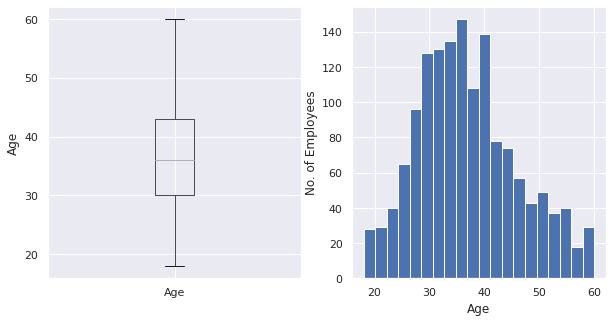

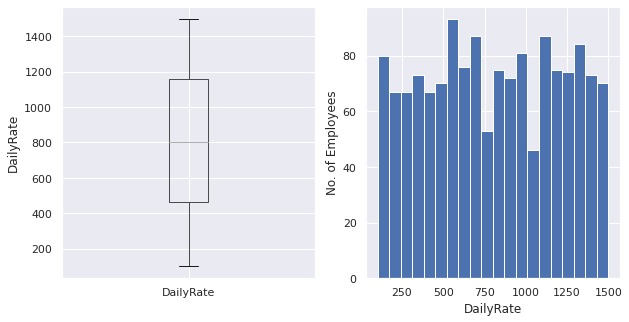

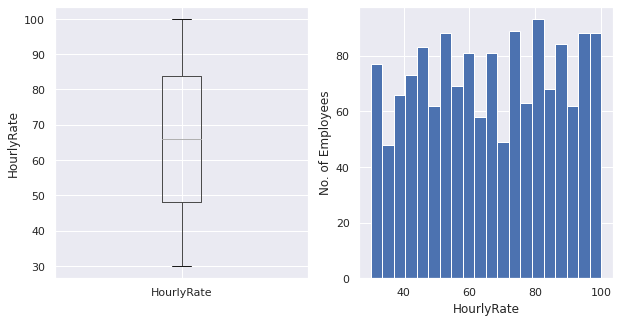

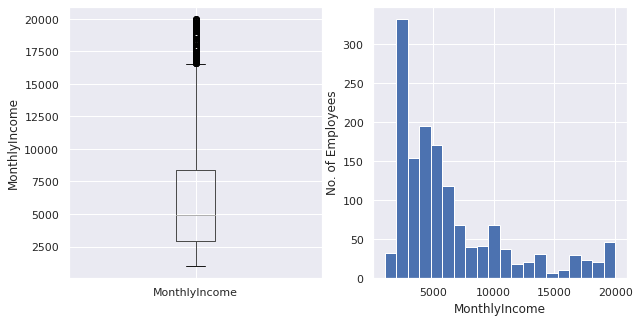

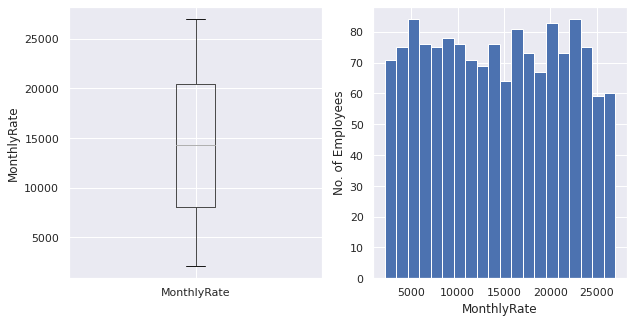

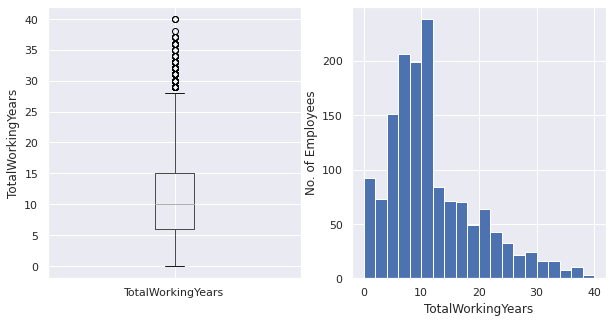

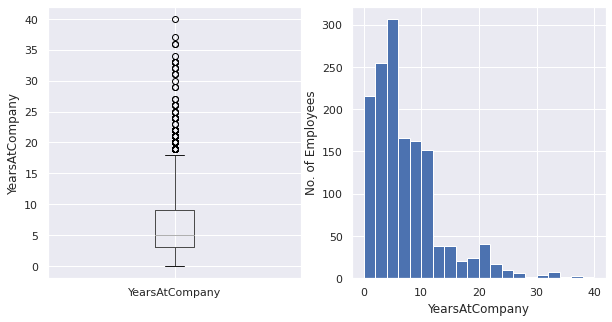

In [19]:
for var in continious:
    #boxplot
    plt.figure(figsize = (10,5))
    plt.subplot(1,2,1)
    fig = numerical.boxplot(column = var)
    fig.set_ylabel(var)
    
    #histogram
    plt.subplot(1,2,2)
    fig = numerical[var].hist(bins = 20)
    fig.set_ylabel('No. of Employees')
    fig.set_xlabel(var)
    
    plt.show()
    

In [20]:
"""numerical.loc[numerical['MonthlyIncome']>16000, 'MonthlyIncome'] = 16000
numerical.loc[numerical['TotalWorkingYears']>28, 'TotalWorkingYears'] = 28
numerical.loc[numerical['YearsAtCompany']>18, 'YearsAtCompany'] = 18
numerical.head()"""

"numerical.loc[numerical['MonthlyIncome']>16000, 'MonthlyIncome'] = 16000\nnumerical.loc[numerical['TotalWorkingYears']>28, 'TotalWorkingYears'] = 28\nnumerical.loc[numerical['YearsAtCompany']>18, 'YearsAtCompany'] = 18\nnumerical.head()"

In [21]:
df.loc[df['MonthlyIncome']>16000, 'MonthlyIncome'] = 16000
df.loc[df['TotalWorkingYears']>28, 'TotalWorkingYears'] = 28
df.loc[df['YearsAtCompany']>18, 'YearsAtCompany'] = 18
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,...,1,0,8,0,1,6,4,0,5,1
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,...,4,1,10,3,3,10,7,1,7,0
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,...,2,0,7,3,3,0,0,0,0,1
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,...,3,0,8,3,3,8,7,3,0,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,...,4,1,6,3,3,2,2,2,2,0


In [22]:
categorical = df.select_dtypes(include = 'object')
print(categorical.columns)

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')


In [23]:
df_cat = pd.get_dummies(categorical)
df_cat.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0,0,1,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1
1,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
4,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0


In [24]:
df = df.drop([
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 
 'OverTime'], axis = 1)
df.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,1102,1,2,2,94,3,2,4,5993,...,1,0,8,0,1,6,4,0,5,1
1,49,279,8,1,3,61,2,2,2,5130,...,4,1,10,3,3,10,7,1,7,0
2,37,1373,2,2,4,92,2,1,3,2090,...,2,0,7,3,3,0,0,0,0,1
3,33,1392,3,4,4,56,3,1,3,2909,...,3,0,8,3,3,8,7,3,0,0
4,27,591,2,1,1,40,3,1,2,3468,...,4,1,6,3,3,2,2,2,2,0


In [25]:
df1 = pd.concat([df,df_cat], axis=1)
df1.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,...,0,0,0,1,0,0,0,1,0,1
1,49,279,8,1,3,61,2,2,2,5130,...,0,0,1,0,0,0,1,0,1,0
2,37,1373,2,2,4,92,2,1,3,2090,...,0,0,0,0,0,0,0,1,0,1
3,33,1392,3,4,4,56,3,1,3,2909,...,0,0,1,0,0,0,1,0,0,1
4,27,591,2,1,1,40,3,1,2,3468,...,0,0,0,0,0,0,1,0,1,0


In [26]:
df1.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative',
       'JobRol

In [27]:
"""df1 = df1.drop(['BusinessTravel_Non-Travel', 'Department_Human Resources', 'EducationField_Other',
                'EducationField_Human Resources', 'JobRole_Human Resources', 'JobRole_Healthcare Representative', 'JobRole_Research Director', 'JobRole_Sales Representative',
                'JobRole_Manager', 'MaritalStatus_Divorced'], axis = 1)
df1.head()"""

"df1 = df1.drop(['BusinessTravel_Non-Travel', 'Department_Human Resources', 'EducationField_Other',\n                'EducationField_Human Resources', 'JobRole_Human Resources', 'JobRole_Healthcare Representative', 'JobRole_Research Director', 'JobRole_Sales Representative',\n                'JobRole_Manager', 'MaritalStatus_Divorced'], axis = 1)\ndf1.head()"

In [28]:
scale_data=[feature for feature in df1.columns if feature not in ['Attrition']]
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler=MinMaxScaler()
df1[scale_data]=scaler.fit_transform(df1[scale_data])
df1.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0.547619,0.715820,0.000000,0.25,0.333333,0.914286,0.666667,0.25,1.000000,0.332466,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.738095,0.126700,0.250000,0.00,0.666667,0.442857,0.333333,0.25,0.333333,0.274898,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.452381,0.909807,0.035714,0.25,1.000000,0.885714,0.333333,0.00,0.666667,0.072110,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.357143,0.923407,0.071429,0.75,1.000000,0.371429,0.666667,0.00,0.666667,0.126743,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.214286,0.350036,0.035714,0.00,0.000000,0.142857,0.666667,0.00,0.333333,0.164032,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [29]:
df1.isnull().sum()

Age                                  0
DailyRate                            0
DistanceFromHome                     0
Education                            0
EnvironmentSatisfaction              0
HourlyRate                           0
JobInvolvement                       0
JobLevel                             0
JobSatisfaction                      0
MonthlyIncome                        0
MonthlyRate                          0
NumCompaniesWorked                   0
PercentSalaryHike                    0
PerformanceRating                    0
RelationshipSatisfaction             0
StockOptionLevel                     0
TotalWorkingYears                    0
TrainingTimesLastYear                0
WorkLifeBalance                      0
YearsAtCompany                       0
YearsInCurrentRole                   0
YearsSinceLastPromotion              0
YearsWithCurrManager                 0
Attrition                            0
BusinessTravel_Non-Travel            0
BusinessTravel_Travel_Fre

In [30]:
u3 = df1.drop(['Attrition'], axis = 1)
u3.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0.547619,0.715820,0.000000,0.25,0.333333,0.914286,0.666667,0.25,1.000000,0.332466,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.738095,0.126700,0.250000,0.00,0.666667,0.442857,0.333333,0.25,0.333333,0.274898,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.452381,0.909807,0.035714,0.25,1.000000,0.885714,0.333333,0.00,0.666667,0.072110,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.357143,0.923407,0.071429,0.75,1.000000,0.371429,0.666667,0.00,0.666667,0.126743,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.214286,0.350036,0.035714,0.00,0.000000,0.142857,0.666667,0.00,0.333333,0.164032,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [31]:
#node_Class
node_Class = df1["Attrition"]

In [32]:
from scipy.spatial.distance import cdist
s = cdist(u3, u3, 'hamming')
s

array([[0.        , 0.66666667, 0.52941176, ..., 0.50980392, 0.56862745,
        0.58823529],
       [0.66666667, 0.        , 0.58823529, ..., 0.45098039, 0.45098039,
        0.49019608],
       [0.52941176, 0.58823529, 0.        , ..., 0.50980392, 0.54901961,
        0.49019608],
       ...,
       [0.50980392, 0.45098039, 0.50980392, ..., 0.        , 0.56862745,
        0.47058824],
       [0.56862745, 0.45098039, 0.54901961, ..., 0.56862745, 0.        ,
        0.45098039],
       [0.58823529, 0.49019608, 0.49019608, ..., 0.47058824, 0.45098039,
        0.        ]])

In [33]:
X1=pd.DataFrame(s)
X1

,0,1,2,3,4,5,6,7,8,9,...,1460,1461,1462,1463,1464,1465,1466,1467,1468,1469
0,0.000000,0.666667,0.529412,0.509804,0.647059,0.529412,0.568627,0.607843,0.627451,0.607843,...,0.509804,0.549020,0.470588,0.568627,0.509804,0.627451,0.647059,0.509804,0.568627,0.588235
1,0.666667,0.000000,0.588235,0.450980,0.450980,0.509804,0.588235,0.470588,0.411765,0.470588,...,0.549020,0.607843,0.588235,0.509804,0.627451,0.431373,0.431373,0.450980,0.450980,0.490196
2,0.529412,0.588235,0.000000,0.490196,0.470588,0.450980,0.470588,0.411765,0.490196,0.509804,...,0.450980,0.470588,0.647059,0.529412,0.431373,0.509804,0.509804,0.509804,0.549020,0.490196
3,0.509804,0.450980,0.490196,0.000000,0.549020,0.431373,0.490196,0.509804,0.509804,0.549020,...,0.470588,0.588235,0.607843,0.607843,0.549020,0.529412,0.568627,0.529412,0.568627,0.568627
4,0.647059,0.450980,0.470588,0.549020,0.000000,0.490196,0.490196,0.431373,0.588235,0.431373,...,0.509804,0.529412,0.549020,0.509804,0.549020,0.392157,0.411765,0.450980,0.470588,0.352941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.627451,0.431373,0.509804,0.529412,0.392157,0.450980,0.470588,0.509804,0.529412,0.411765,...,0.529412,0.568627,0.588235,0.509804,0.607843,0.000000,0.450980,0.470588,0.431373,0.411765
1466,0.647059,0.431373,0.509804,0.568627,0.411765,0.529412,0.509804,0.490196,0.490196,0.372549,...,0.490196,0.490196,0.490196,0.470588,0.568627,0.450980,0.000000,0.529412,0.509804,0.431373
1467,0.509804,0.450980,0.509804,0.529412,0.450980,0.607843,0.470588,0.450980,0.490196,0.509804,...,0.588235,0.509804,0.607843,0.509804,0.607843,0.470588,0.529412,0.000000,0.568627,0.470588
1468,0.568627,0.450980,0.549020,0.568627,0.470588,0.509804,0.568627,0.607843,0.490196,0.450980,...,0.509804,0.509804,0.509804,0.509804,0.509804,0.431373,0.509804,0.568627,0.000000,0.450980


In [34]:
# taking average of the hamming distance matrix
y = np.average(X1)
y

0.5171816935390936

In [35]:
adjmat_df=X1.copy()

In [36]:
# setting threshold value as mean of hamming matrix
adjmat_df[adjmat_df < y]=0
adjmat_df[adjmat_df >= y]=1

In [37]:
# adjacency matrix
adjmat_df

,0,1,2,3,4,5,6,7,8,9,...,1460,1461,1462,1463,1464,1465,1466,1467,1468,1469
0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1466,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1467,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1468,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [38]:
G = nx.from_numpy_matrix(np.array(adjmat_df))
G

In [39]:
A=nx.to_numpy_matrix(G)
A

matrix([[0., 1., 1., ..., 0., 1., 1.],
        [1., 0., 1., ..., 0., 0., 0.],
        [1., 1., 0., ..., 0., 1., 0.],
        ...,
        [0., 0., 0., ..., 0., 1., 0.],
        [1., 0., 1., ..., 1., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]])

In [40]:
H=nx.from_numpy_matrix(A)
H

In [41]:
square_feature_dataframe = StellarGraph.from_networkx(H, node_features=adjmat_df)
print(square_feature_dataframe.info())

StellarGraph: Undirected multigraph
 Nodes: 1470, Edges: 541676

 Node types:
  default: [1470]
    Features: float32 vector, length 1470
    Edge types: default-default->default

 Edge types:
    default-default->default: [541676]
        Weights: all 1 (default)
        Features: none


In [42]:
from stellargraph.mapper import (
    CorruptedGenerator,
    FullBatchNodeGenerator,
    GraphSAGENodeGenerator,
    HinSAGENodeGenerator,
    ClusterNodeGenerator,
)
from stellargraph import StellarGraph
from stellargraph.layer import GCN, DeepGraphInfomax, GraphSAGE, GAT, APPNP, HinSAGE

from stellargraph import datasets
from stellargraph.utils import plot_history

import pandas as pd
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from IPython.display import display, HTML

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow.keras import Model

In [43]:
fullbatch_generator = FullBatchNodeGenerator(square_feature_dataframe, sparse=False)
fullbatch_generator 

Using GCN (local pooling) filters...


In [44]:
gcn_model = GCN(layer_sizes=[64], activations=["relu"], generator=fullbatch_generator)
gcn_model

In [45]:
x_emb_in, x_emb_out = gcn_model.in_out_tensors()

# for full batch models, squeeze out the batch dim (which is 1)
x_out = tf.squeeze(x_emb_out, axis=0)
emb_model = Model(inputs=x_emb_in, outputs=x_out)
emb_model

In [46]:
all_nodes = df1['Attrition'].index
all_gen = fullbatch_generator.flow(all_nodes)

In [47]:
emb = emb_model.predict(all_gen)
emb.shape

1/1 [==============================] - 1s 658ms/step


(1470, 64)

In [48]:
node_emb = pd.DataFrame(emb)
node_emb

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,1.219983,0.723824,0.0,0.0,0.000000,0.0,1.114777,0.009690,0.322330,...,0.964913,0.520783,0.776891,0.0,0.0,2.389243,0.244593,0.758953,0.0,1.154980
1,0.0,1.076586,0.305840,0.0,0.0,0.000000,0.0,1.216267,0.000000,0.342464,...,0.992063,0.217636,0.867066,0.0,0.0,2.044968,0.452665,0.722806,0.0,0.758611
2,0.0,1.059665,0.544030,0.0,0.0,0.002596,0.0,1.117002,0.000000,0.368838,...,0.967474,0.269493,0.704091,0.0,0.0,2.052861,0.428394,0.750277,0.0,0.740532
3,0.0,0.874591,0.523603,0.0,0.0,0.000000,0.0,0.877698,0.000000,0.351583,...,0.894878,0.264981,0.816462,0.0,0.0,2.099518,0.423004,0.652451,0.0,0.877264
4,0.0,0.838232,0.288462,0.0,0.0,0.000000,0.0,1.131682,0.000000,0.340375,...,0.939739,0.000000,0.835565,0.0,0.0,1.684158,0.261177,0.745856,0.0,0.605620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,0.958929,0.342044,0.0,0.0,0.000000,0.0,1.268873,0.000000,0.284701,...,0.957967,0.170190,0.946894,0.0,0.0,1.965834,0.386667,0.799776,0.0,0.685072
1466,0.0,1.017052,0.295650,0.0,0.0,0.000000,0.0,1.233417,0.027933,0.315905,...,1.014019,0.057425,0.929910,0.0,0.0,1.890221,0.319090,0.796073,0.0,0.653449
1467,0.0,1.158618,0.427026,0.0,0.0,0.000000,0.0,1.181957,0.000000,0.348047,...,0.992126,0.241431,0.867294,0.0,0.0,2.193933,0.456388,0.796560,0.0,0.751474
1468,0.0,1.236410,0.459785,0.0,0.0,0.000000,0.0,1.440488,0.030835,0.270807,...,0.936452,0.396047,0.914815,0.0,0.0,2.137193,0.232006,0.794063,0.0,1.032241


In [49]:
node_Class = df1['Attrition']

In [50]:
node_emb['Class'] = node_Class

In [51]:
node_emb

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,Class
0,0.0,1.219983,0.723824,0.0,0.0,0.000000,0.0,1.114777,0.009690,0.322330,...,0.520783,0.776891,0.0,0.0,2.389243,0.244593,0.758953,0.0,1.154980,1
1,0.0,1.076586,0.305840,0.0,0.0,0.000000,0.0,1.216267,0.000000,0.342464,...,0.217636,0.867066,0.0,0.0,2.044968,0.452665,0.722806,0.0,0.758611,0
2,0.0,1.059665,0.544030,0.0,0.0,0.002596,0.0,1.117002,0.000000,0.368838,...,0.269493,0.704091,0.0,0.0,2.052861,0.428394,0.750277,0.0,0.740532,1
3,0.0,0.874591,0.523603,0.0,0.0,0.000000,0.0,0.877698,0.000000,0.351583,...,0.264981,0.816462,0.0,0.0,2.099518,0.423004,0.652451,0.0,0.877264,0
4,0.0,0.838232,0.288462,0.0,0.0,0.000000,0.0,1.131682,0.000000,0.340375,...,0.000000,0.835565,0.0,0.0,1.684158,0.261177,0.745856,0.0,0.605620,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,0.958929,0.342044,0.0,0.0,0.000000,0.0,1.268873,0.000000,0.284701,...,0.170190,0.946894,0.0,0.0,1.965834,0.386667,0.799776,0.0,0.685072,0
1466,0.0,1.017052,0.295650,0.0,0.0,0.000000,0.0,1.233417,0.027933,0.315905,...,0.057425,0.929910,0.0,0.0,1.890221,0.319090,0.796073,0.0,0.653449,0
1467,0.0,1.158618,0.427026,0.0,0.0,0.000000,0.0,1.181957,0.000000,0.348047,...,0.241431,0.867294,0.0,0.0,2.193933,0.456388,0.796560,0.0,0.751474,0
1468,0.0,1.236410,0.459785,0.0,0.0,0.000000,0.0,1.440488,0.030835,0.270807,...,0.396047,0.914815,0.0,0.0,2.137193,0.232006,0.794063,0.0,1.032241,0


In [52]:
emb = pd.concat([u3, node_emb], axis = 1)
emb.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,55,56,57,58,59,60,61,62,63,Class
0,0.547619,0.715820,0.000000,0.25,0.333333,0.914286,0.666667,0.25,1.000000,0.332466,...,0.520783,0.776891,0.0,0.0,2.389243,0.244593,0.758953,0.0,1.154980,1
1,0.738095,0.126700,0.250000,0.00,0.666667,0.442857,0.333333,0.25,0.333333,0.274898,...,0.217636,0.867066,0.0,0.0,2.044968,0.452665,0.722806,0.0,0.758611,0
2,0.452381,0.909807,0.035714,0.25,1.000000,0.885714,0.333333,0.00,0.666667,0.072110,...,0.269493,0.704091,0.0,0.0,2.052861,0.428394,0.750277,0.0,0.740532,1
3,0.357143,0.923407,0.071429,0.75,1.000000,0.371429,0.666667,0.00,0.666667,0.126743,...,0.264981,0.816462,0.0,0.0,2.099518,0.423004,0.652451,0.0,0.877264,0
4,0.214286,0.350036,0.035714,0.00,0.000000,0.142857,0.666667,0.00,0.333333,0.164032,...,0.000000,0.835565,0.0,0.0,1.684158,0.261177,0.745856,0.0,0.605620,0


In [53]:
X = emb.drop(['Class'], axis = 1)
Y = emb['Class']

In [54]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report,accuracy_score
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.metrics import confusion_matrix, recall_score, precision_score,f1_score
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [55]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=10, random_state=1, shuffle=True)
kf = KFold(n_splits=10)

In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7, stratify=Y)

In [57]:
from sklearn.linear_model import PassiveAggressiveClassifier
pa=PassiveAggressiveClassifier(max_iter=1000, random_state=7, tol=1e-3)
pa.fit(x_train, y_train)
y_pred=pa.predict(x_test)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('accuracy_score: ', accuracy_score(y_test, y_pred))

[[215  32]
 [ 16  31]]
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       247
           1       0.49      0.66      0.56        47

    accuracy                           0.84       294
   macro avg       0.71      0.77      0.73       294
weighted avg       0.86      0.84      0.85       294

accuracy_score:  0.8367346938775511


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [58]:
from sklearn.svm import LinearSVC
lsvm = LinearSVC()
lsvm.fit(x_train, y_train)
y_pred=lsvm.predict(x_test)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('accuracy_score: ', accuracy_score(y_test, y_pred))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


[[241   6]
 [ 29  18]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       247
           1       0.75      0.38      0.51        47

    accuracy                           0.88       294
   macro avg       0.82      0.68      0.72       294
weighted avg       0.87      0.88      0.86       294

accuracy_score:  0.8809523809523809


In [59]:
rf = RandomForestClassifier(n_estimators=300)
rf.fit(x_train, y_train)
y_pred=rf.predict(x_test)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('accuracy_score: ', accuracy_score(y_test, y_pred))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


[[244   3]
 [ 39   8]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       247
           1       0.73      0.17      0.28        47

    accuracy                           0.86       294
   macro avg       0.79      0.58      0.60       294
weighted avg       0.84      0.86      0.82       294

accuracy_score:  0.8571428571428571


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [60]:
import xgboost as xgb
xgbc = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, 
              gamma=0,  importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, 
             n_estimators=200, n_jobs=16,
              num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, subsample=1,
              tree_method='exact', use_label_encoder=False
              )
xgbc.fit(x_train, y_train)
y_pred=xgbc.predict(x_test)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('accuracy_score: ', accuracy_score(y_test, y_pred))

/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[[245   2]
 [ 33  14]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       247
           1       0.88      0.30      0.44        47

    accuracy                           0.88       294
   macro avg       0.88      0.64      0.69       294
weighted avg       0.88      0.88      0.86       294

accuracy_score:  0.8809523809523809


In [61]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=10000) 
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
y_pred = []
y_exp = []

for train_index, test_index in folds.split(X, Y):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    lr.fit(x_train, y_train)
    # store result from classification
    y_pred.extend(lr.predict(x_test))
    # store expected result for this specific fold
    y_exp.extend(y_test)

print("Accuracy: ",  accuracy_score(y_exp, y_pred))
print(classification_report(y_exp, y_pred))
print("Confusion matrix: ", confusion_matrix(y_exp, y_pred))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklea

Accuracy:  0.8843537414965986
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1233
           1       0.77      0.40      0.53       237

    accuracy                           0.88      1470
   macro avg       0.83      0.69      0.73      1470
weighted avg       0.87      0.88      0.87      1470

Confusion matrix:  [[1205   28]
 [ 142   95]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [62]:
from sklearn.svm import LinearSVC
lsvm = LinearSVC()
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
y_pred = []
y_exp = []

for train_index, test_index in folds.split(X, Y):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    lsvm.fit(x_train, y_train)
    # store result from classification
    y_pred.extend(lsvm.predict(x_test))
    # store expected result for this specific fold
    y_exp.extend(y_test)

print("Accuracy: ",  accuracy_score(y_exp, y_pred))
print(classification_report(y_exp, y_pred))
print("Confusion matrix: ", confusion_matrix(y_exp, y_pred))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge,

Accuracy:  0.8857142857142857
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1233
           1       0.76      0.42      0.54       237

    accuracy                           0.89      1470
   macro avg       0.83      0.70      0.74      1470
weighted avg       0.88      0.89      0.87      1470

Confusion matrix:  [[1202   31]
 [ 137  100]]


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [63]:
from sklearn.linear_model import PassiveAggressiveClassifier
pa=PassiveAggressiveClassifier(max_iter=1000, random_state=7, tol=1e-3)
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
y_pred = []
y_exp = []

for train_index, test_index in folds.split(X, Y):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    pa.fit(x_train, y_train)
    # store result from classification
    y_pred.extend(pa.predict(x_test))
    # store expected result for this specific fold
    y_exp.extend(y_test)

print("Accuracy: ",  accuracy_score(y_exp, y_pred))
print(classification_report(y_exp, y_pred))
print("Confusion matrix: ", confusion_matrix(y_exp, y_pred))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklea

Accuracy:  0.7761904761904762
              precision    recall  f1-score   support

           0       0.89      0.84      0.86      1233
           1       0.35      0.46      0.40       237

    accuracy                           0.78      1470
   macro avg       0.62      0.65      0.63      1470
weighted avg       0.80      0.78      0.79      1470

Confusion matrix:  [[1031  202]
 [ 127  110]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklea

In [64]:
gbc = GradientBoostingClassifier(n_estimators=300)
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
y_pred = []
y_exp = []

for train_index, test_index in folds.split(X, Y):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    gbc.fit(x_train, y_train)
    # store result from classification
    y_pred.extend(gbc.predict(x_test))
    # store expected result for this specific fold
    y_exp.extend(y_test)

print("Accuracy: ",  accuracy_score(y_exp, y_pred))
print(classification_report(y_exp, y_pred))
print("Confusion matrix: ", confusion_matrix(y_exp, y_pred))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklea

Accuracy:  0.8625850340136054
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1233
           1       0.65      0.32      0.43       237

    accuracy                           0.86      1470
   macro avg       0.76      0.65      0.68      1470
weighted avg       0.84      0.86      0.84      1470

Confusion matrix:  [[1191   42]
 [ 160   77]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
